<a href="https://colab.research.google.com/github/badrinarayanan02/Reinforcement-Learning/blob/main/2348507_RLLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonstationary Bandit Problem

It involves dealing with scenarios where the reward distribution for each arm changes over time. There are lot of algorithms are available to implement non stationary bandits. Here we are going to use discounted thompson sampling algorithm.

### Loading the Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class NonstationaryBandit:
    def __init__(self, n_arms, decay_factor=0.99):
        self.n_arms = n_arms
        self.decay_factor = decay_factor
        self.alpha = np.ones(n_arms)  # Success
        self.beta = np.ones(n_arms)   # Failures
        self.means = np.random.rand(n_arms)

    def select_arm(self):
        samples = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.n_arms)]
        return np.argmax(samples)

    def get_reward(self, arm):
        reward = np.random.binomial(1, self.means[arm])
        # Introducing nonstationarity by gradually shifting the means
        self.means += (np.random.rand(self.n_arms) - 0.5) * 0.01
        return reward

    def update(self, arm, reward):
        self.alpha = self.decay_factor * self.alpha
        self.beta = self.decay_factor * self.beta
        # Updating the selected arm with the observed reward
        if reward == 1:
            self.alpha[arm] += 1
        else:
            self.beta[arm] += 1

    def run(self, steps=1000):
        rewards = []
        for _ in range(steps):
            arm = self.select_arm()
            reward = self.get_reward(arm)
            self.update(arm, reward)
            rewards.append(reward)
        return np.cumsum(rewards) / np.arange(1, steps + 1)

### Inference

This class implements a nonstationary multi-armed bandit with a Thompson Sampling approach.

It Continuously adapts to changing reward probabilities. Uses a decay factor to prioritize recent observations. Simulates real-world scenarios where reward patterns shift, helping develop policies that balance exploration and exploitation in dynamic environments.







In [21]:
bandit = NonstationaryBandit(n_arms=2, decay_factor=0.95)
average_rewards = bandit.run(steps=1000)

### Visualization

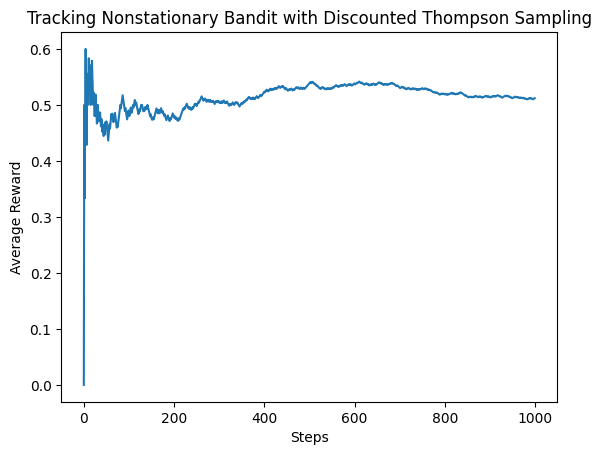

In [22]:
plt.plot(average_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Tracking Nonstationary Bandit with Discounted Thompson Sampling')
plt.show()

### Inference

 Initially, the algorithm rapidly learns, showing a sharp increase in average reward, followed by some fluctuations as it balances exploration and exploitation in response to the dynamic environment. The decay factor allows the algorithm to prioritize recent information, enabling it to track shifts in optimal arms and maintain a steady average reward around 0.6. This approach proves to be a viable solution for handling nonstationary settings, where reward patterns are continuously evolving.

# Conclusion


Thus the implementation of non stationary multi armed bandit problem has been done successfully. Initially defined all the parameters. While getting the reward, introducted non stationarity by gradually shifting the means. Next updated the arm ran it for 1000 steps. At last visualized the non stationary bandit problem with discounted thompson sampling, initially the algorithm rapidly learned after that some fluctuations happened because of dynamic environment. Another example of non stationarity is stock prices etc.